In [21]:
import networkx as nx
import pandas as pd
from scipy.stats import entropy
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import copy
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
import ndlib.models.ModelConfig as mc
import future.utils
from bokeh.palettes import Category20_9 as cols
%matplotlib inline

In [5]:
G = nx.read_gexf('../data_collection/data/GS.gexf')
for node in list(G.nodes()):
  if 'geo' not in G.nodes[node] or G.nodes[node]['geo'] == 'None':
    G.remove_node(node)
print('Number of nodes in the geo-graph: ', len(G.nodes()))

Number of nodes in the geo-graph:  30979


In [7]:
G = G.to_undirected()
weakly_components = list(nx.connected_components(G))
giant_component = nx.subgraph(G, max(weakly_components, key=len))
print('Number of nodes in giant component of the geo-graph: ', len(giant_component.nodes()))

Number of nodes in giant component of the geo-graph:  16879


In [28]:
left_nodes = []
right_nodes = []

for u in giant_component.nodes():
  if 'labels_political_leaning_cat' in giant_component.nodes[u]:
    if giant_component.nodes[u]['labels_political_leaning_cat'] == 'r':
      right_nodes.append(u)
    else:
      left_nodes.append(u)

# Geo-Subgraph creation via BFS

In [9]:
visited = set()
left = []
right = []
queue = ["t2_lk1r0df"]
visited.add(queue[0])
numLeft = 867
numRight = 133
while(len(queue) > 0 and (numLeft > 0 or numRight > 0)):
  node = queue.pop()
  if 'labels_political_leaning_cat' in giant_component.nodes[node]:
    if giant_component.nodes()[node]['labels_political_leaning_cat'] == 'r' and numRight > 0:
      right.append(node)
      numRight-=1
    if giant_component.nodes()[node]['labels_political_leaning_cat'] == 'l' and numLeft > 0:
      left.append(node)
      numLeft-=1
  for u in giant_component.neighbors(node):
    if not u in visited:
      if node in left or node in right:
        queue.append(u)
      visited.add(u)

In [10]:
subgraph = giant_component.subgraph(left + right)
complete_subgraph = nx.complete_graph(1000)

# Discrete Opinion Dynamic

## Opinion Dynamic on geo-graph

In [31]:
def run_and_plot(model,num_it, fraction_infected=None,infected_nodes=None, q=None, filename=None):
  config = mc.Configuration()
  if fraction_infected != None:
    config.add_model_parameter('fraction_infected', fraction_infected)
  elif infected_nodes != None:
    config.add_model_initial_configuration("Infected", infected_nodes)
  else:
    assert False, 'wrong parameters'
  if q != None:
    config.add_model_parameter('q', q)
  model.set_initial_status(config)
  iterations = model.iteration_bunch(num_it)
  trends = model.build_trends(iterations)
  viz = DiffusionTrend(model, trends)
  if filename != None:
    viz.plot(filename)
  else:
    viz.plot()

### Voter Model

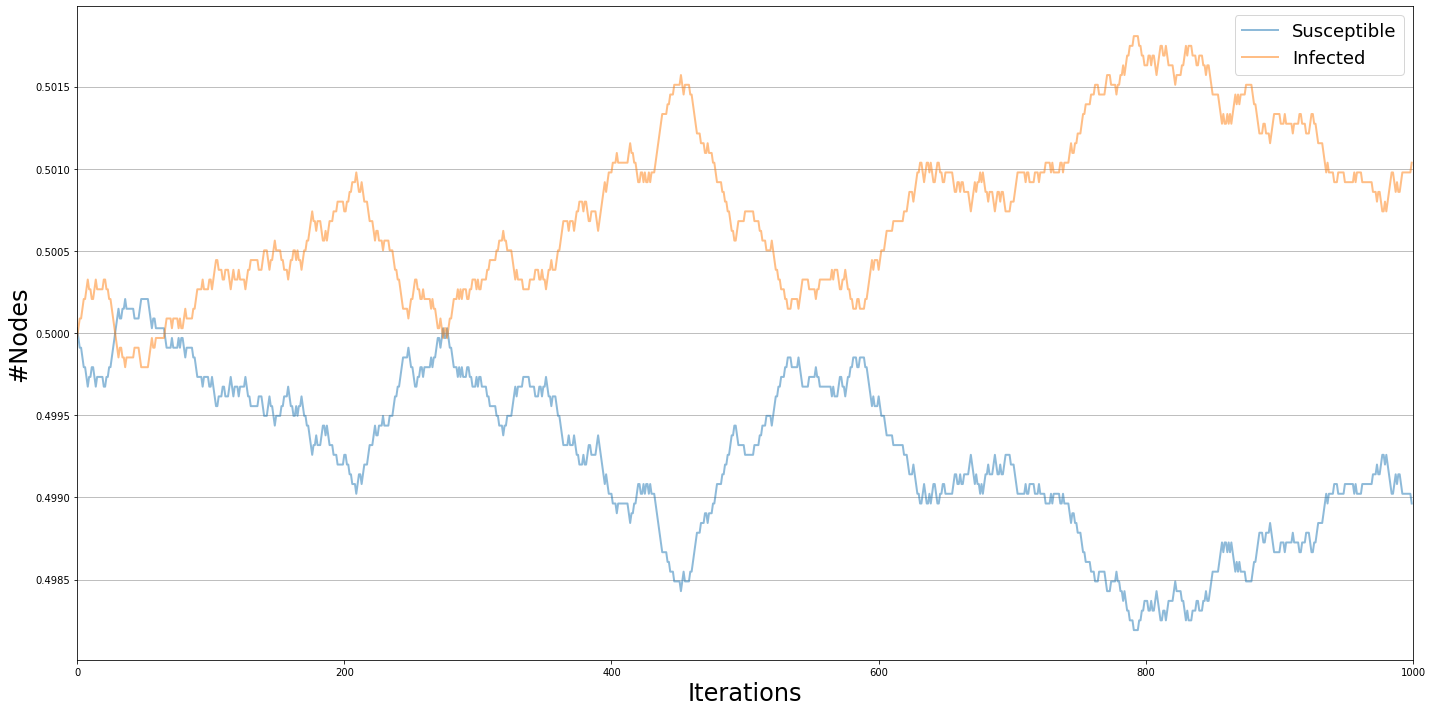

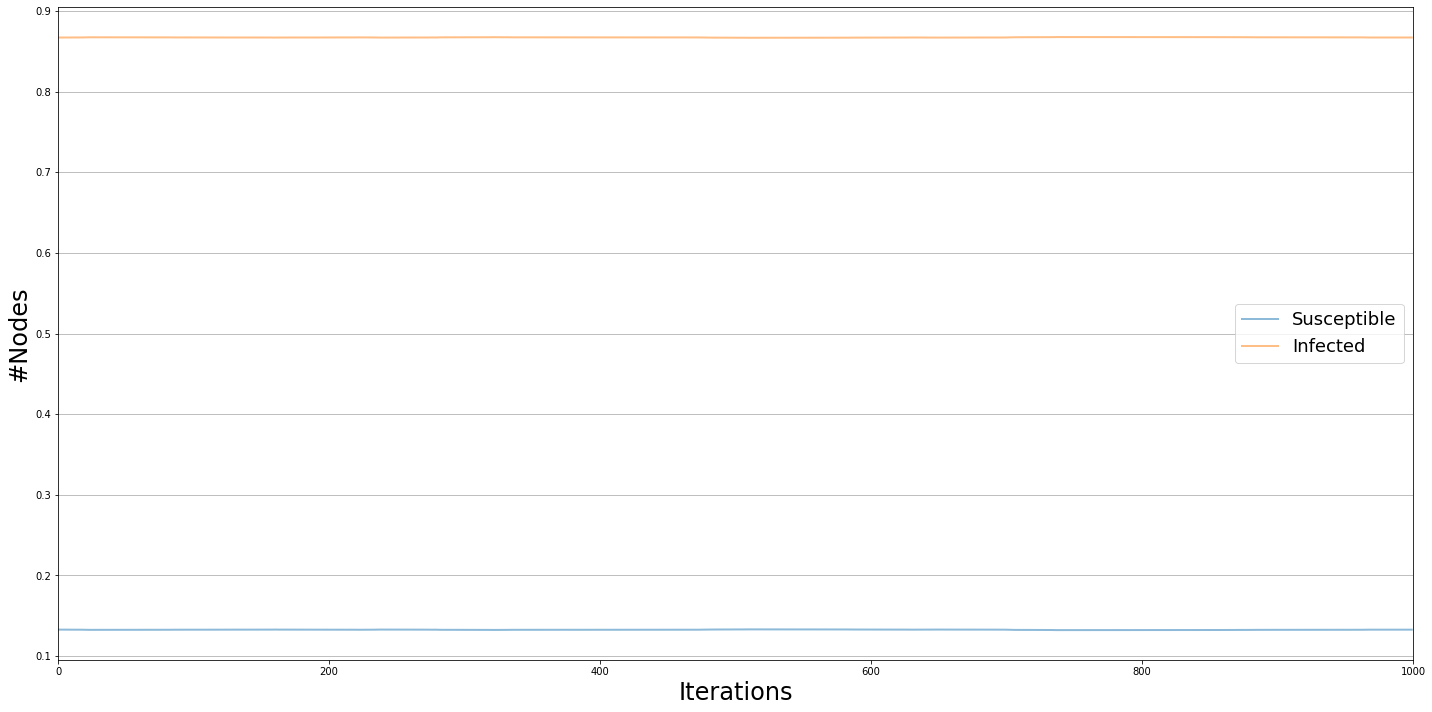

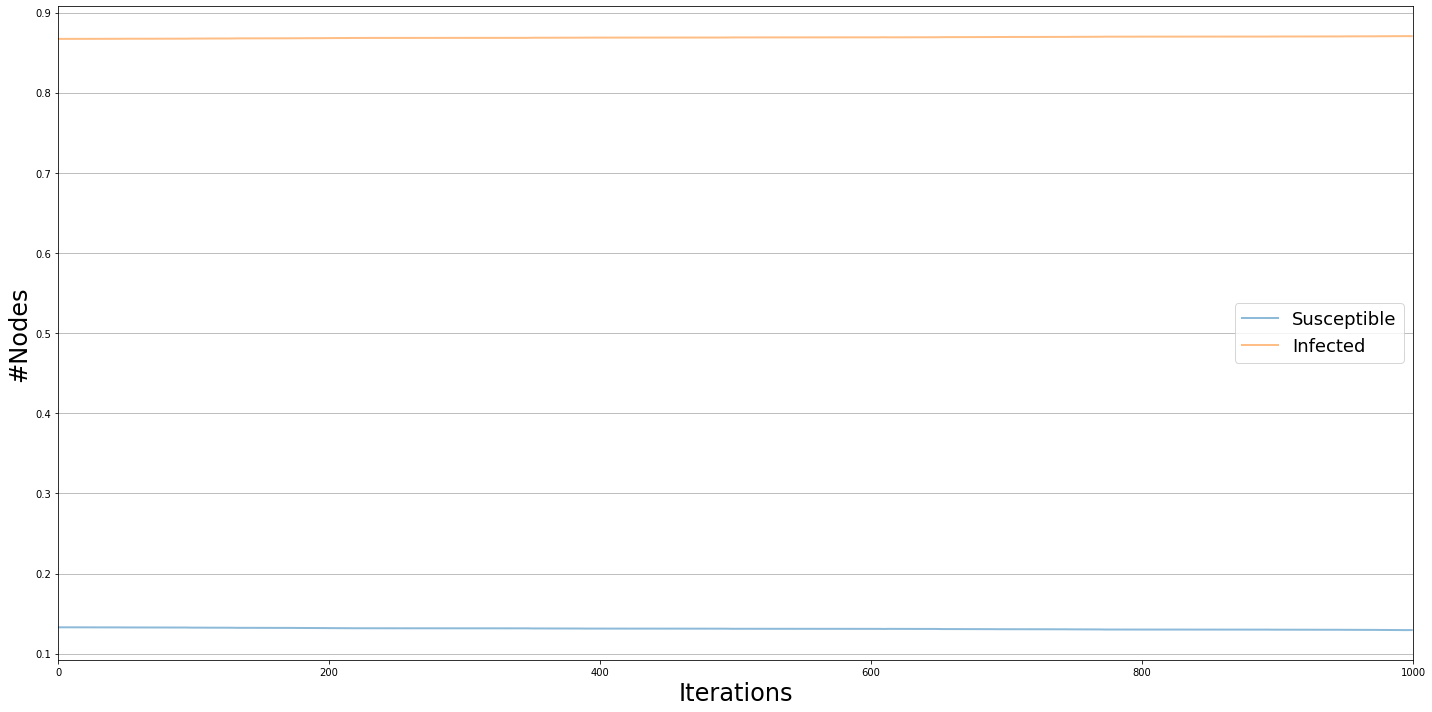

In [32]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.VoterModel(giant_component, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.VoterModel(giant_component, seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

### QVoter

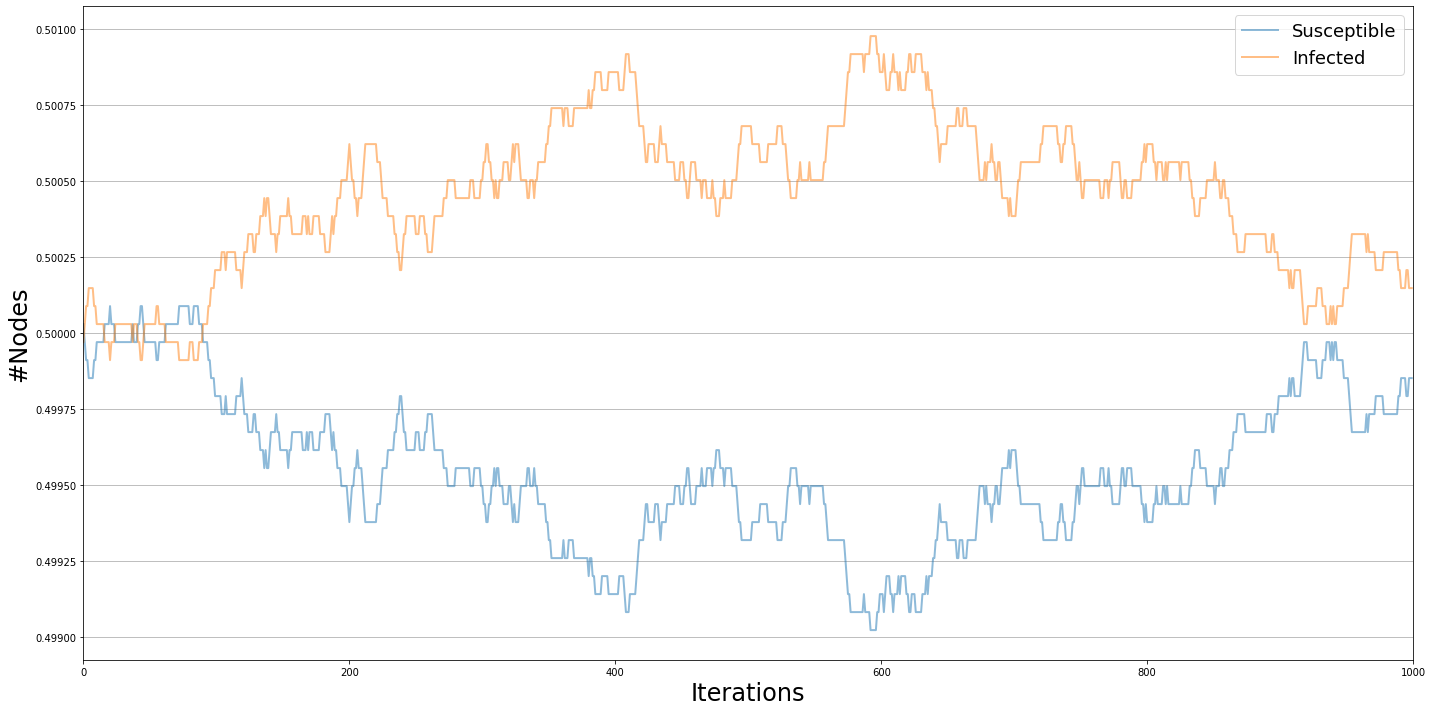

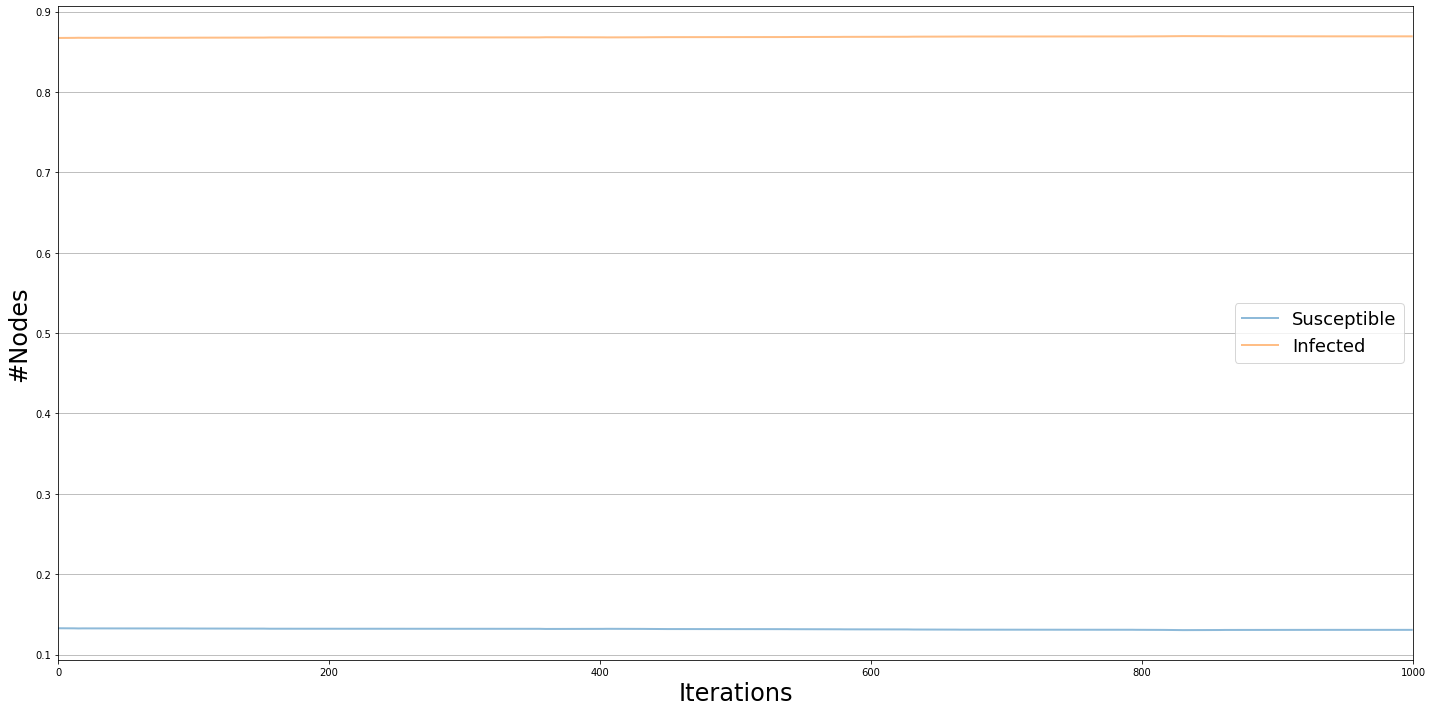

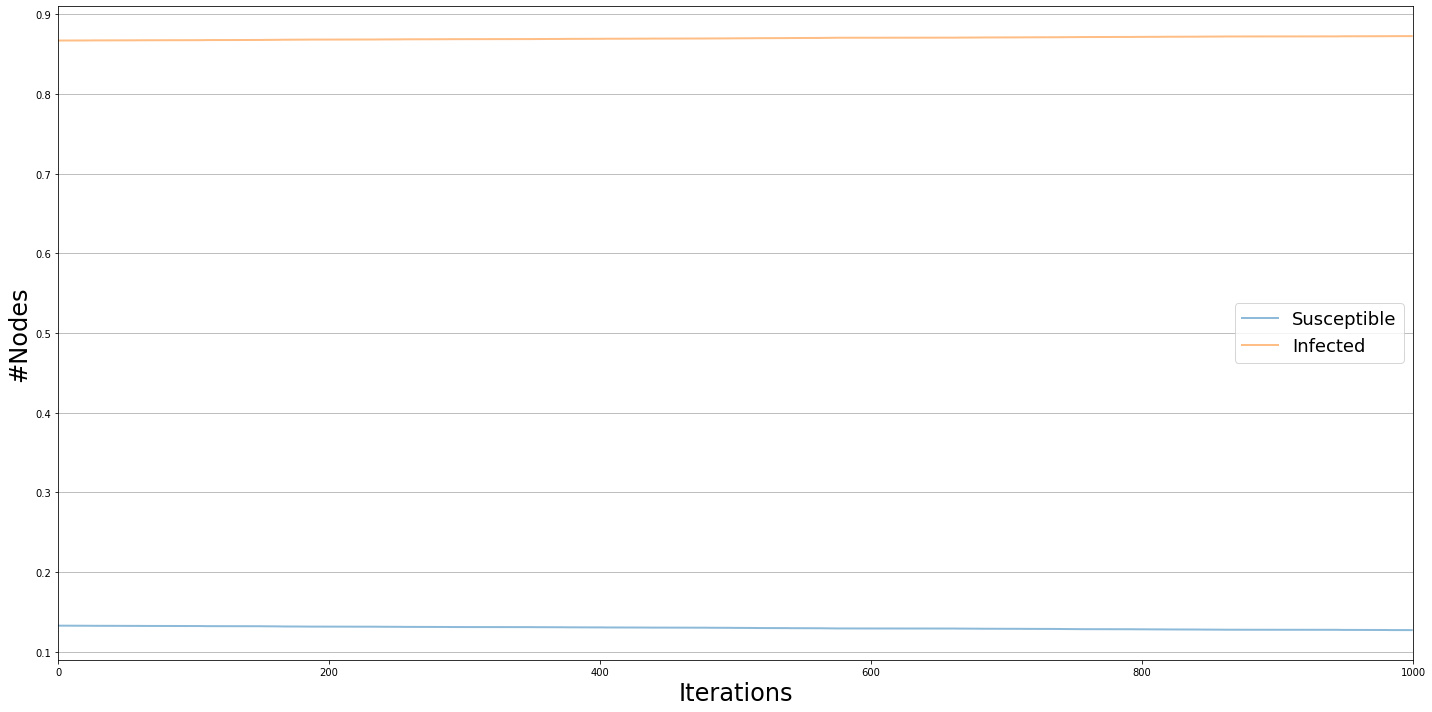

In [33]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.QVoterModel(giant_component, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.QVoterModel(giant_component,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Majority

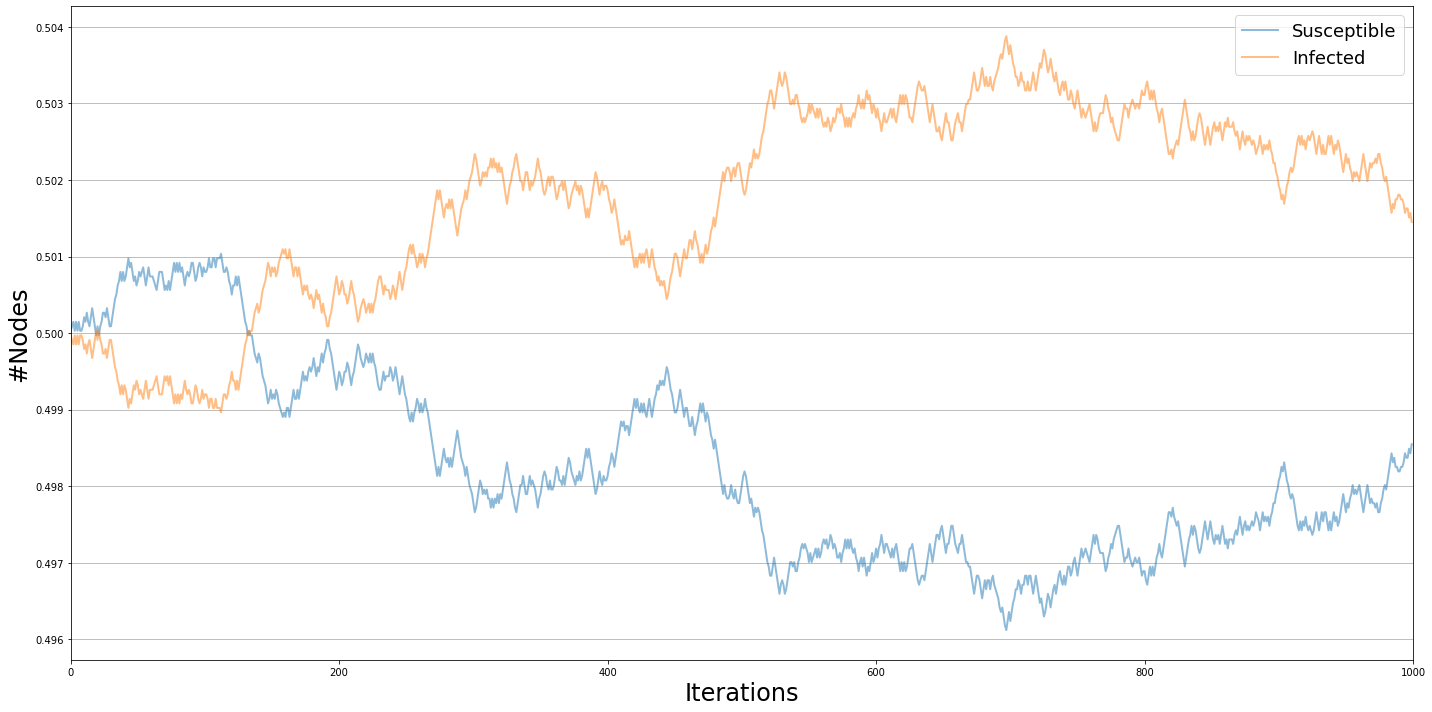

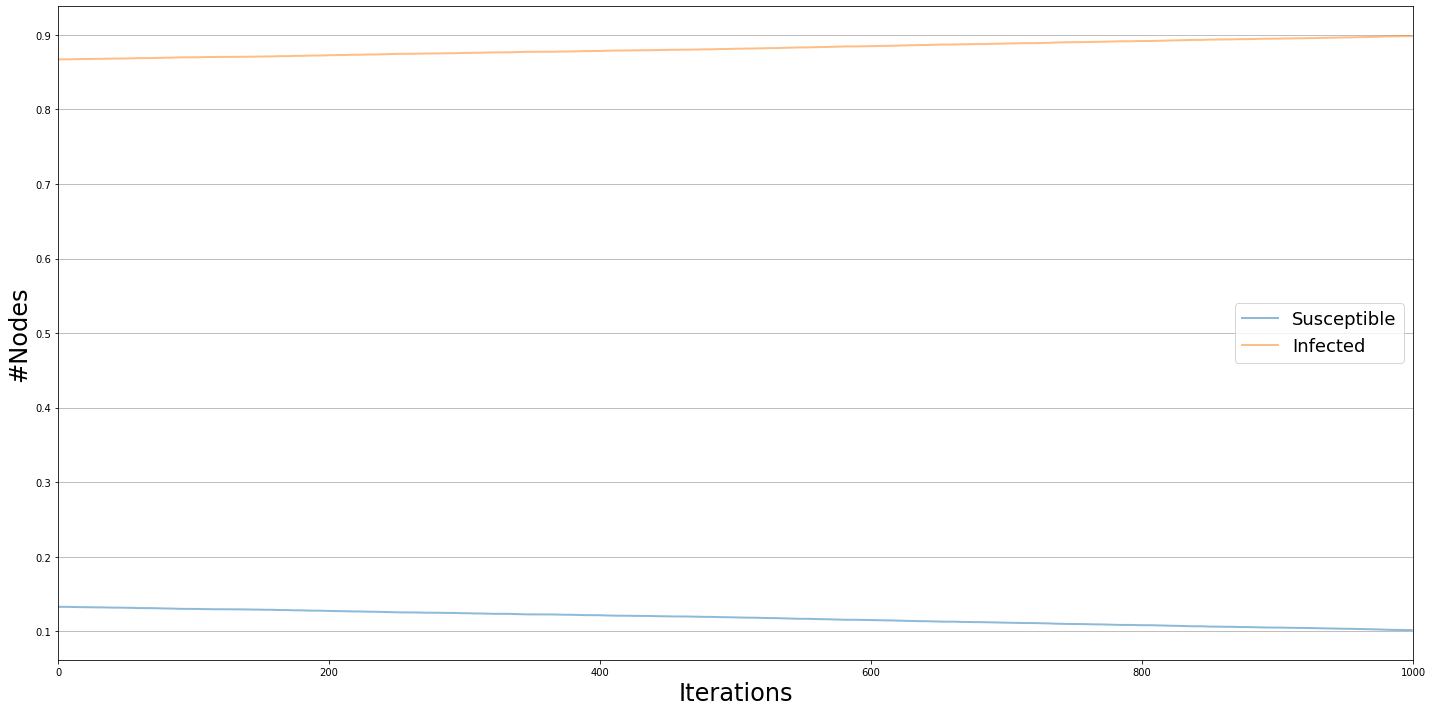

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.MajorityRuleModel(giant_component, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.MajorityRuleModel(giant_component,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Sznajd

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.SznajdModel(giant_component, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.SznajdModel(giant_component,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

## Opinion Dynamics on subgeo-graph




### Voter Model

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.VoterModel(subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.VoterModel(subgraph, seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

### QVoter

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.QVoterModel(subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.QVoterModel(subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Majority

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.MajorityRuleModel(subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.MajorityRuleModel(subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Sznajd

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.SznajdModel(subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.SznajdModel(subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

## Opinion Dynamics on complete subgeo-graph




### Voter Model

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.VoterModel(complete_subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.VoterModel(complete_subgraph, seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

### QVoter

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.QVoterModel(complete_subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.QVoterModel(complete_subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Majority

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.MajorityRuleModel(complete_subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi,q=5)
  model = op.MajorityRuleModel(complete_subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes,q=5)

### Sznajd

In [ ]:
graph_pol_dist = (len(left_nodes))/(len(left_nodes) + len(right_nodes))
model = op.SznajdModel(complete_subgraph, seed=0)
for fi in [0.5, graph_pol_dist]:
  run_and_plot(model,1000,fraction_infected=fi)
  model = op.SznajdModel(complete_subgraph,seed=0)
run_and_plot(model,1000,infected_nodes=left_nodes)

#Continuos Opinion Dynamics

In [ ]:
# change node id in integer as requested by algoithm bias

node_attrs = {}
node_dict = {}
edgs_attrs = {}

i = 0
subgraph_int_id = nx.Graph()
for node in subgraph.nodes():
  node_dict[node] = i
  subgraph_int_id.add_node(i)
  node_attrs[i] = subgraph.nodes[node]
  i += 1

nx.set_node_attributes(subgraph_int_id, node_attrs)

for (u,v) in subgraph.edges():
  u_num = node_dict[u]
  v_num = node_dict[v]
  edgs_attrs[(u_num,v_num)] = giant_component.get_edge_data(u,v)
  subgraph_int_id.add_edge(u_num,v_num)

nx.set_edge_attributes(subgraph_int_id, edgs_attrs)

## Sub-geo graph Continuos Opinion Dynamic

### Deffuant

In [ ]:
model = op.AlgorithmicBiasModel(subgraph_int_id)

config = mc.Configuration()
config.add_model_parameter("epsilon", 0.5)
config.add_model_parameter("gamma", 0)

model.set_initial_status(config)

iterations = model.iteration_bunch(5000)
viz = OpinionEvolution(model, iterations)
viz.plot()

### Algoithm bias

In [ ]:
model = op.AlgorithmicBiasModel(subgraph_int_id)

config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", 0.4)

model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(5000)
viz = OpinionEvolution(model, iterations)
viz.plot()

## Complete Sub-geo graph Continuos Opinion Dynamic

### Deffuant

In [ ]:
model = op.AlgorithmicBiasModel(complete_subgraph)

config = mc.Configuration()
config.add_model_parameter("epsilon", 0.5)
config.add_model_parameter("gamma", 0)

model.set_initial_status(config)

iterations = model.iteration_bunch(5000)
viz = OpinionEvolution(model, iterations)
viz.plot()

### Algoithm bias

In [ ]:
model = op.AlgorithmicBiasModel(complete_subgraph)

config = mc.Configuration()
config.add_model_parameter("epsilon", 0.2)
config.add_model_parameter("gamma", 0.4)

model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(5000)
viz = OpinionEvolution(model, iterations)
viz.plot()